<a href="https://colab.research.google.com/github/masoud-moghini/TinyML/blob/main/TinyMLCh03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.keras.layers import Dense

In [3]:
model = Sequential()

In [4]:
from tensorflow.keras.datasets import mnist
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print('shape of training data' ,X_train.shape)
print('shape of training labels',Y_train.shape)
print('shape of training data ',X_test.shape)
print('shape of training labels ',Y_test.shape)
print('type of X_train ',type(X_train))
print('type of y_train ',type(Y_train))

shape of training data (60000, 28, 28)
shape of training labels (60000,)
shape of training data  (10000, 28, 28)
shape of training labels  (10000,)
type of X_train  <class 'numpy.ndarray'>
type of y_train  <class 'numpy.ndarray'>


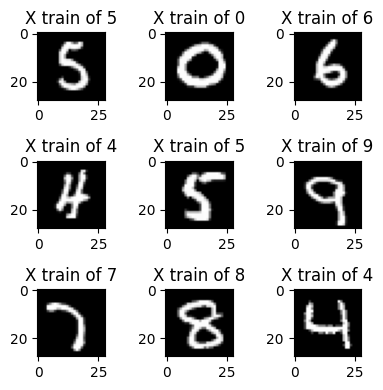

In [6]:
import matplotlib.pyplot as plt
import random
import numpy as np
plt.rcParams['figure.figsize'] = (4,4)
for i in range(9):
  plt.subplot(3,3,i+1)
  num = random.randint(1,len(X_train))
  plt.imshow(X_train[num],cmap='gray')
  plt.title('X train of {}'.format(Y_train[num]))

plt.tight_layout()

In [7]:
# Reshape Input to be Feed into the model

X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

# Normalize data in order to be feed into the model Pre-processing


X_train.astype('float32')
X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

# Categorize output using one-hot encoding


In [8]:
from tensorflow.keras.utils import to_categorical
num_class = 10
print('label of 100th instance in training data: ', Y_train[100])
print('label of 500th instance in test data: ', Y_test[500])
Y_train = to_categorical(Y_train, num_class)
Y_test = to_categorical(Y_test, num_class)
print('label of 100th instance in training data one hot encoded: ',Y_test[500])

label of 100th instance in training data:  5
label of 500th instance in test data:  3
label of 100th instance in training data one hot encoded:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [9]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_class, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [11]:
Y_train.shape

(60000, 10)

In [12]:
X_train.shape

(60000, 784)

In [13]:
model.fit(X_train,Y_train,batch_size=128,epochs=10,verbose=1)

Epoch 1/10
469/469 [==============================] - 13s 24ms/step - loss: 0.2358 - accuracy: 0.9312
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0886 - accuracy: 0.9731
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0545 - accuracy: 0.9830
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0386 - accuracy: 0.9878
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0299 - accuracy: 0.9904
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0211 - accuracy: 0.9932
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0179 - accuracy: 0.9944
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0150 - accuracy: 0.9951
Epoch 9/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0147 - accuracy: 0.9949
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0130 - accur

In [ ]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
X_train.reshape(-1,X_train.shape[1],X_train.shape[2],1)
X_test.reshape(-1,X_test.shape[1],X_test.shape[2],1)

In [15]:
Y_train = to_categorical(Y_train, num_class)
Y_test = to_categorical(Y_test, num_class)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout,Flatten

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train,Y_train,batch_size=128, epochs= 10)

Epoch 1/10
469/469 [==============================] - 54s 114ms/step - loss: 0.1862 - accuracy: 0.9460
Epoch 2/10
469/469 [==============================] - 54s 114ms/step - loss: 0.1171 - accuracy: 0.9645
Epoch 3/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0968 - accuracy: 0.9701
Epoch 4/10
469/469 [==============================] - 46s 97ms/step - loss: 0.0825 - accuracy: 0.9744
Epoch 5/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0733 - accuracy: 0.9773
Epoch 6/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0677 - accuracy: 0.9793
Epoch 7/10
469/469 [==============================] - 45s 97ms/step - loss: 0.0634 - accuracy: 0.9801
Epoch 8/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0606 - accuracy: 0.9812
Epoch 9/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0583 - accuracy: 0.9813
Epoch 10/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0

[]

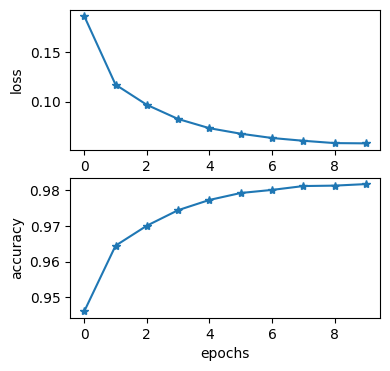

In [25]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(history.history['loss'], '*-')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'],'*-')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot()

In [26]:
score = model.evaluate(X_test,Y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.0362 - accuracy: 0.9881


In [27]:
print('loss on test data: ', score[0])
print('accuracy on test data:', score[1])

loss on test data:  0.036234963685274124
accuracy on test data: 0.988099992275238
